In [8]:
import os
import polars as pl


while not os.getcwd().endswith("nlp-playground"):
    os.chdir("..")
print(os.getcwd())

from notebooks.price_cube.enums import Category, Column
import matplotlib.pyplot as plt
from notebooks.price_cube.environment import Environment
import numpy as np


/Users/cristian/Personal/Projects/nlp-playground


In [9]:
BASE_DIR = os.path.join("notebooks", "price_cube")
DATASET_DIR = os.path.join(BASE_DIR, "dataset")
DATA_PATH = os.path.join(DATASET_DIR, "price_cube.parquet")

In [10]:
DATA_PATH

'notebooks/price_cube/dataset/price_cube.parquet'

In [11]:
df = pl.read_parquet(DATA_PATH)

Product ID: SPORT003


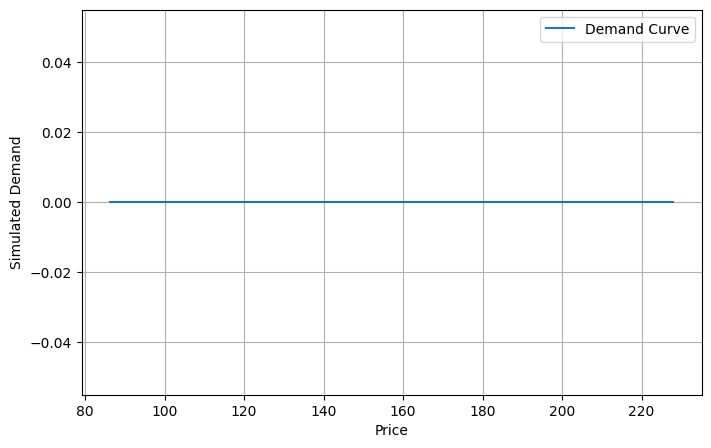

Product ID: ELEC003


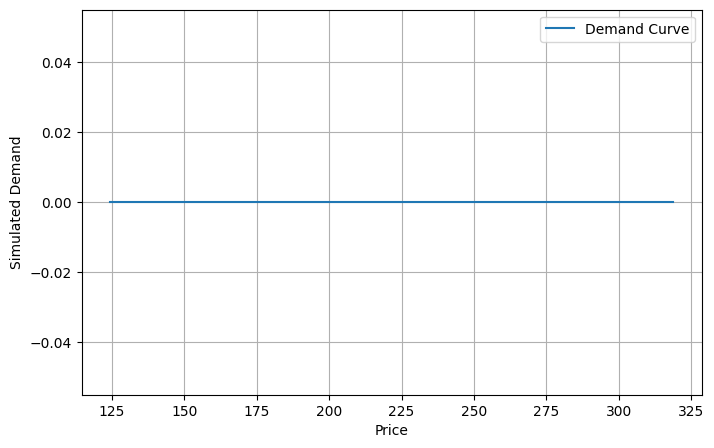

Product ID: APP002


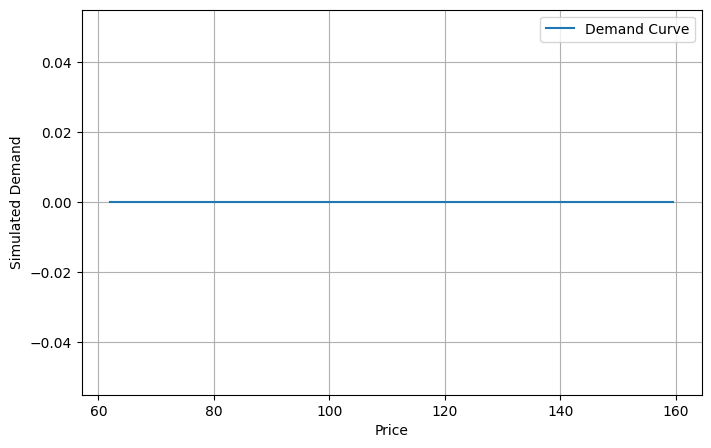

Product ID: BEAU001


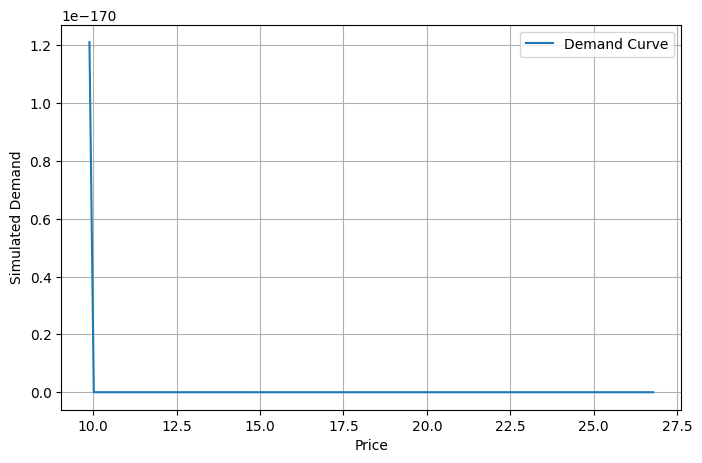

Product ID: SPORT001


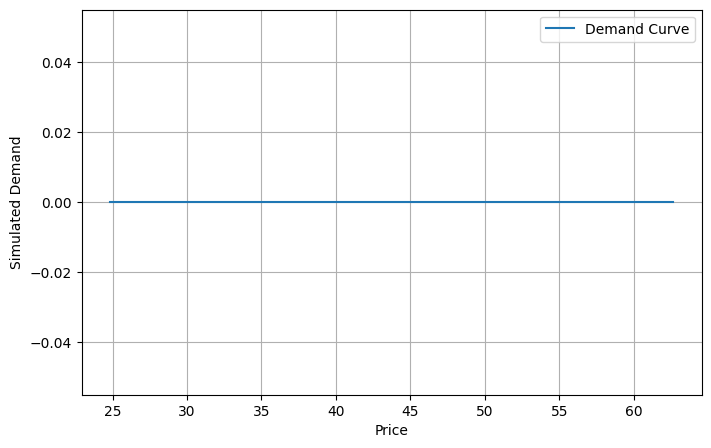

Product ID: HOME003


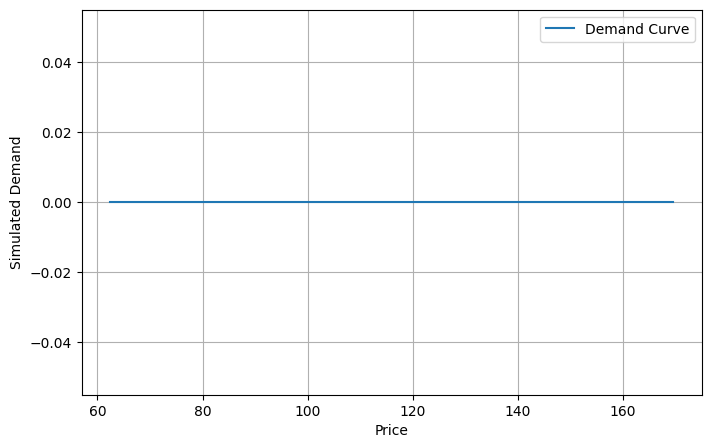

Product ID: SPORT002


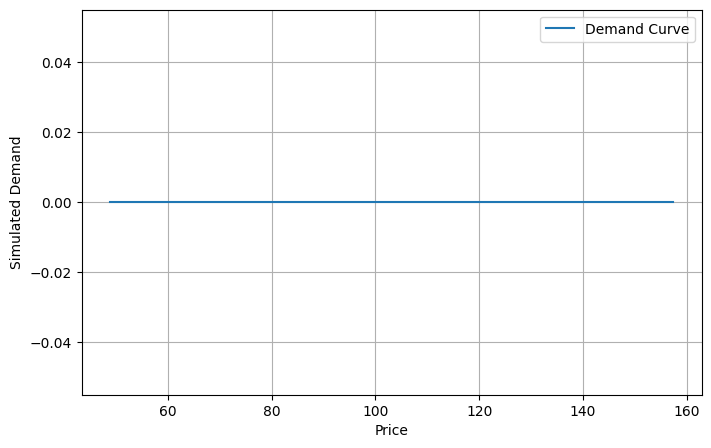

Product ID: ELEC001


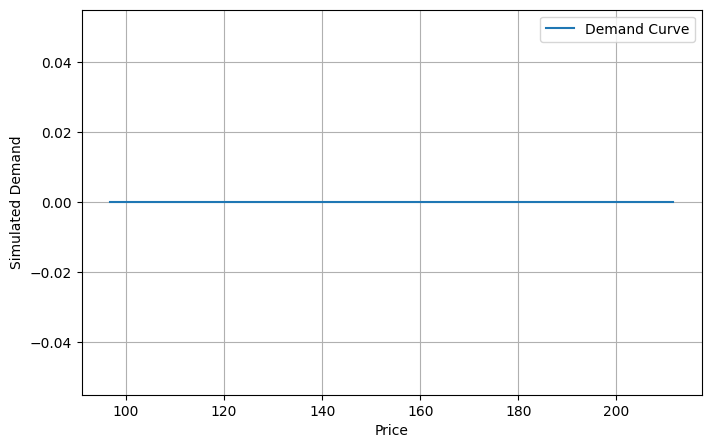

Product ID: APP003


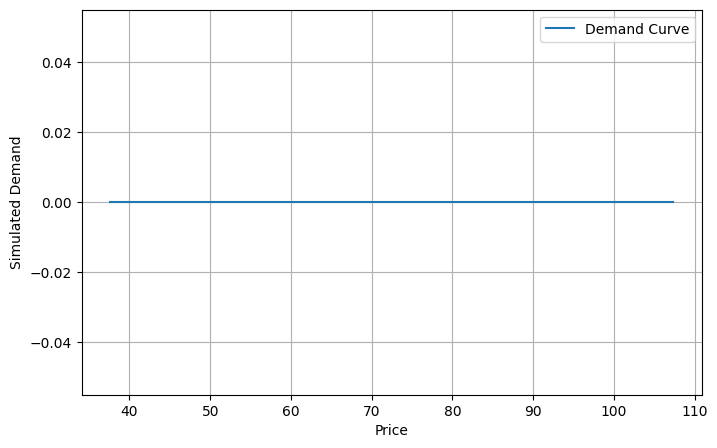

Product ID: HOME001


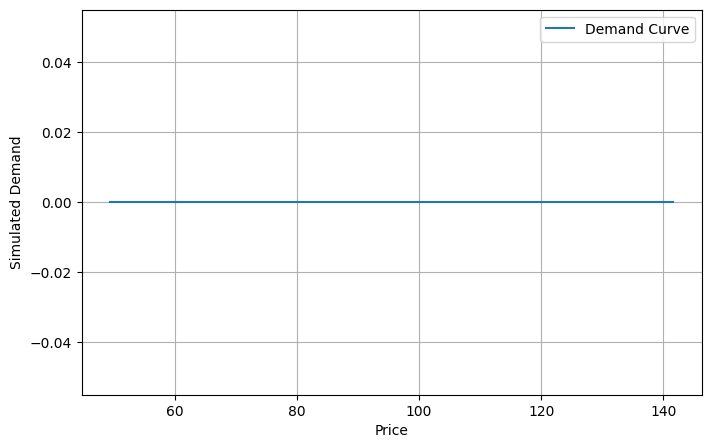

Product ID: BEAU002


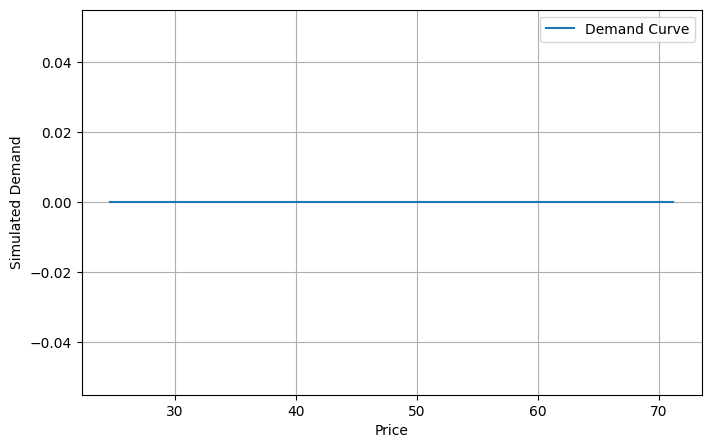

Product ID: ELEC002


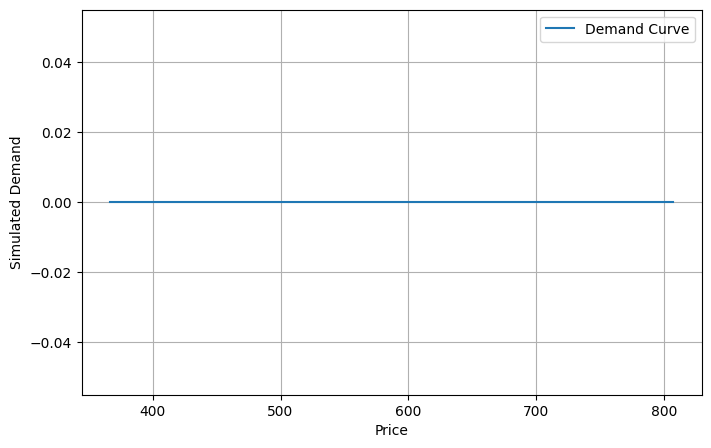

Product ID: HOME002


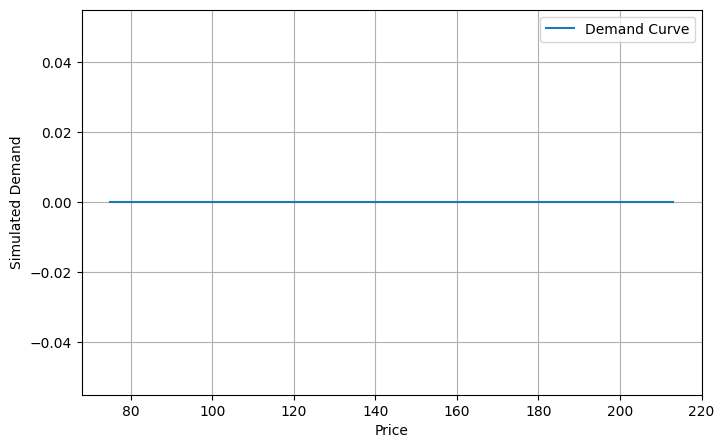

Product ID: BEAU003


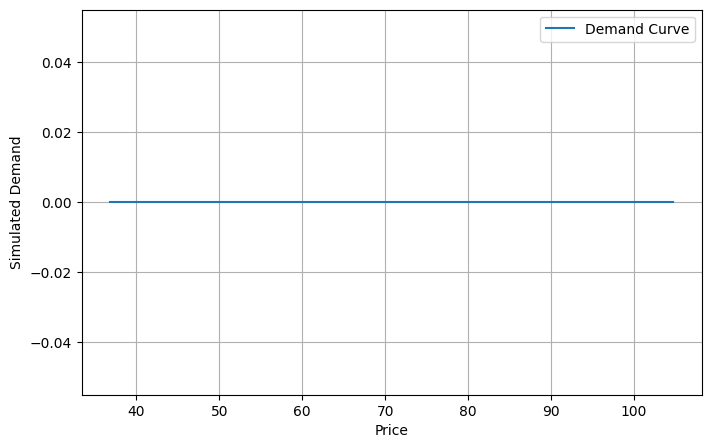

Product ID: APP001


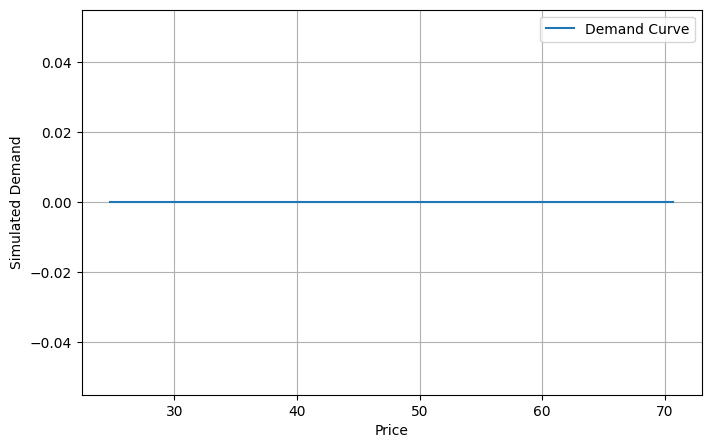

In [ ]:
env = Environment()


def plot_demand_curve_for_product():
    # Filter product info using Polars
    for product_id in df[Column.SKU.value].unique().to_numpy():
        print(f"Product ID: {product_id}")
        products = df.filter(pl.col(Column.SKU.value) == product_id).sort(
            pl.col(Column.CURRENT_PRICE.value)
        )

        current_prices = products[Column.CURRENT_PRICE.value].to_numpy()
        units_sold = products[Column.UNITS_SOLD.value].to_numpy()

        smoothed = env.demand(current_prices)
        # Plot
        plt.figure(figsize=(8, 5))
        plt.plot(current_prices, smoothed, label="Demand Curve")
        plt.xlabel("Price")
        plt.ylabel("Simulated Demand")
        plt.grid(True)
        plt.legend()
        plt.show()


plot_demand_curve_for_product()